Quadratic discriminant analysis allows for the classifier to assess non -linear relationships. This of course something that linear discriminant analysis is not able to do.

Automatically created module for IPython interactive environment


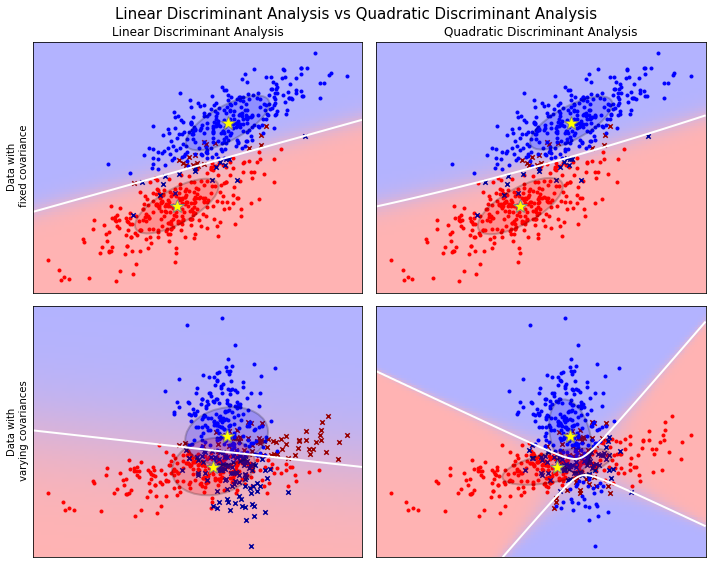

In [1]:
print(__doc__)

from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# #############################################################################
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


# #############################################################################
# Generate datasets
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


# #############################################################################
# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with\n varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.', color='red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x',
                s=20, color='#990000')  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='blue')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=20, color='#000099')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='black', linewidth=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'blue')


plt.figure(figsize=(10, 8), facecolor='white')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant Analysis',
             y=0.98, fontsize=15)
for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis('tight')
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

## Examine the Wages Data by QDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import (confusion_matrix,accuracy_score)
import seaborn as sns
from matplotlib.colors import ListedColormap

In [4]:
from pydataset import data

initiated datasets repo at: /Users/nehamangal/.pydataset/


In [5]:
df = data('Wages1')

In [6]:
df.head(n=20)

,exper,sex,school,wage
1,9,female,13,6.315296
2,12,female,12,5.479770
3,11,female,11,3.642170
4,9,female,14,4.593337
5,8,female,14,2.418157
6,9,female,14,2.094058
7,8,female,12,5.512004
8,10,female,12,3.548427
9,12,female,10,5.818226
10,7,female,12,3.827780


In [10]:
df2 = pd.get_dummies(df['sex'])

In [15]:
df1 = pd.concat([df, df2], axis =1)

(array([0.00178578, 0.        , 0.01428622, 0.        , 0.        ,
        0.05893068, 0.        , 0.        , 0.11875424, 0.        ,
        0.        , 0.18929247, 0.        , 0.        , 0.32054716,
        0.        , 0.        , 0.42055073, 0.        , 0.        ,
        0.56430587, 0.        , 0.        , 0.58394943, 0.        ,
        0.        , 0.2928676 , 0.        , 0.        , 0.20447159,
        0.        , 0.        , 0.09821779, 0.        , 0.        ,
        0.03125112, 0.        , 0.        , 0.02053645, 0.        ,
        0.        , 0.00892889, 0.        , 0.        , 0.008036  ,
        0.        , 0.        , 0.00178578, 0.        , 0.00267867]),
 array([ 1.  ,  1.34,  1.68,  2.02,  2.36,  2.7 ,  3.04,  3.38,  3.72,
         4.06,  4.4 ,  4.74,  5.08,  5.42,  5.76,  6.1 ,  6.44,  6.78,
         7.12,  7.46,  7.8 ,  8.14,  8.48,  8.82,  9.16,  9.5 ,  9.84,
        10.18, 10.52, 10.86, 11.2 , 11.54, 11.88, 12.22, 12.56, 12.9 ,
        13.24, 13.58, 13.92, 14.26

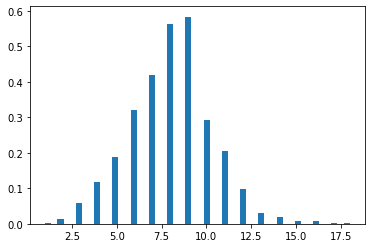

In [20]:
plt.hist(df['exper'], bins=50, density = True)

<Figure size 432x288 with 0 Axes>

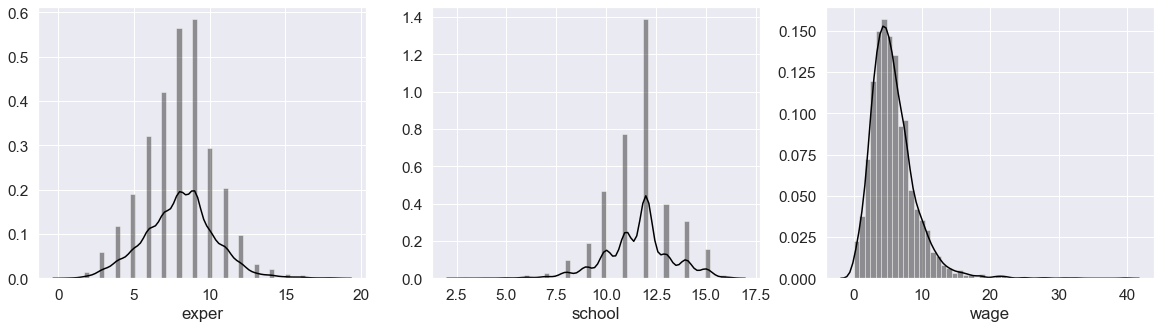

In [24]:
fig = plt.figure()
fig, axs = plt.subplots(figsize=(20, 5),ncols=3)
sns.set(font_scale=1.4)
sns.distplot(df1['exper'],color='black',ax=axs[0])
sns.distplot(df1['school'],color='black',ax=axs[1])
sns.distplot(df1['wage'],color='black',ax=axs[2])

In [33]:
round(df1.groupby('sex').count()/df1['sex'].count(), 2)

,exper,school,wage,female,male
sex,,,,,
female,0.48,0.48,0.48,0.48,0.48
male,0.52,0.52,0.52,0.52,0.52


In [31]:
df1['sex'].count()

3294

In [38]:
#correlation


corrmat=df1.corr(method='pearson')

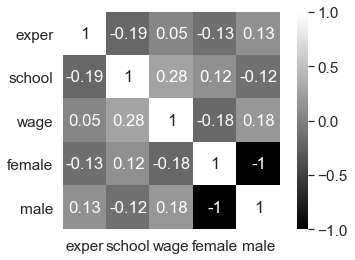

In [41]:
sns.heatmap(round(corrmat,2),vmax=1.,square=True,cmap="gray",annot=True)

In [42]:
df1.cov()

,exper,school,wage,female,male
exper,5.247128,-0.734943,0.384768,-0.148228,0.148228
school,-0.734943,2.747454,1.530776,0.098598,-0.098598
wage,0.384768,1.530776,10.687576,-0.290959,0.290959
female,-0.148228,0.098598,-0.290959,0.249515,-0.249515
male,0.148228,-0.098598,0.290959,-0.249515,0.249515


In [44]:
X =df1[['exper','school','wage']]
y = df1['male']

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [55]:
lda = LinearDiscriminantAnalysis(n_components = 1)
qda = QuadraticDiscriminantAnalysis()

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2, random_state=50)

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc = StandardScaler()

In [51]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [52]:
X_train[1:5]

,exper,school,wage
1890,6,11,6.609782
1181,2,12,2.568317
2690,5,13,2.143557
2874,9,11,6.326293


In [53]:
X_train_std[1:5]

array([[-0.89508485, -0.40007754,  0.24618511],
       [-2.66609936,  0.20543901, -0.96245456],
       [-1.33783848,  0.81095556, -1.08948324],
       [ 0.43317604, -0.40007754,  0.16140479]])

In [56]:
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [57]:
lda.explained_variance_ratio_

array([1.])

In [58]:
np.unique(y_train)

array([0, 1], dtype=uint8)

In [66]:
X_train_lda

array([[ 0.59632876],
       [ 0.1790346 ],
       [-1.84625056],
       ...,
       [ 1.39623367],
       [-0.85731744],
       [ 0.31694209]])

In [69]:
lda2 = LinearDiscriminantAnalysis()

In [70]:
X_train_lda2 = lda2.fit_transform(X_train_std, y_train)

In [71]:
X_train_lda2

array([[ 0.59632876],
       [ 0.1790346 ],
       [-1.84625056],
       ...,
       [ 1.39623367],
       [-0.85731744],
       [ 0.31694209]])

In [73]:
y_pred=lda.predict(X_test_std)

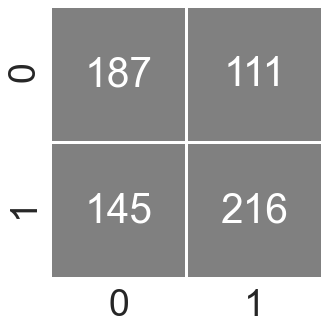

In [75]:
cm = confusion_matrix(y_test, y_pred)
from matplotlib.colors import ListedColormap
ax= plt.subplots(figsize=(5,5))
sns.set(font_scale=3.4)
with sns.axes_style('white'):
    sns.heatmap(cm, cbar=False, square=True,annot=True,fmt='g',
                    cmap=ListedColormap(['gray']),linewidths=2.5)

In [76]:
accuracy_score(y_pred, y_test)

0.6115326251896813

In [83]:
qda.fit(X_train_std, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [84]:
y_pred = qda.predict(X_train_std)

In [86]:
confusion_matrix(y_train, y_pred)

array([[942, 329],
       [732, 632]])

In [88]:
accuracy_score(y_pred, y_train)

0.5973434535104364

In [89]:
y_pred_test = qda.predict(X_test_std)

In [90]:
confusion_matrix(y_test, y_pred_test)

array([[219,  79],
       [177, 184]])

In [91]:
accuracy_score(y_pred_test, y_test)

0.6115326251896813

In [92]:
from sklearn.decomposition import PCA

In [99]:
pca = PCA(n_components=3)

In [100]:
X_train_pca = pca.fit_transform(X_train_std)

In [104]:
X_train_pca.shape

(2635, 3)

In [103]:
pca.explained_variance_ratio_

array([0.43766617, 0.35093611, 0.21139771])